# EDA using Bivariate and Multivariate Analysis

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
titanic = pd.read_csv('/content/train.csv')

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1.Scatterplot (Numerical - Numerical)

<Axes: xlabel='total_bill', ylabel='tip'>

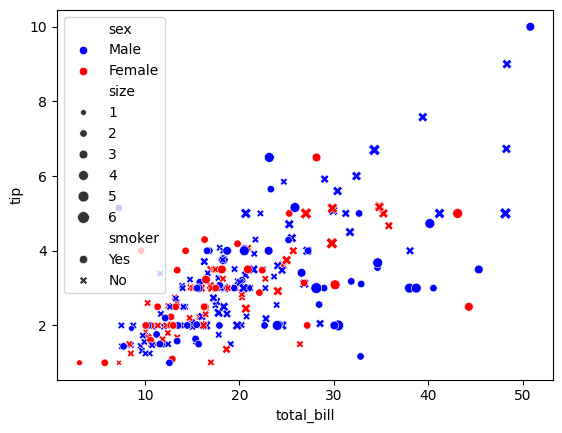

In [ ]:
custom_palette = {'Male': 'blue', 'Female': 'red'}
sns.scatterplot(x=tips['total_bill'],y=tips['tip'],hue=tips['sex'],style=tips['smoker'] ,size=tips['size'],palette=custom_palette,data=tips)

# 2.Bar Plot (Numerical - Catagorical)

<Axes: xlabel='Pclass', ylabel='Age'>

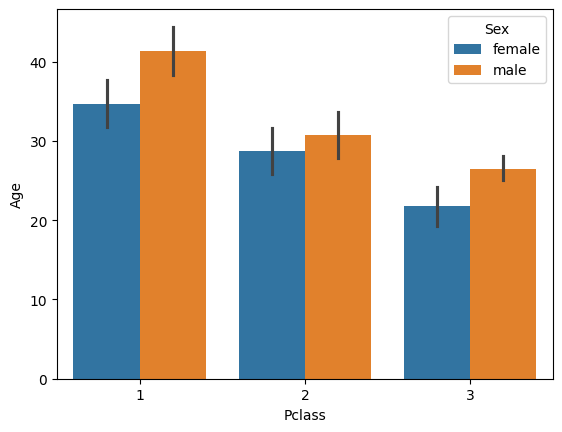

In [35]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic['Sex'],data=titanic)

# 3.Box Plot (Numerical - Categorical)

<Axes: xlabel='Sex', ylabel='Age'>

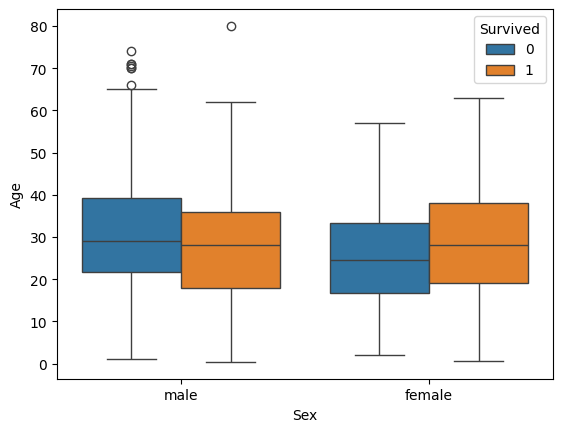

In [37]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'],data=titanic)

# 4.Displot (Numerical - Catagorical)

<ipython-input-63-cbe39738c5ad>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==0]['Age'])
<ipython-input-63-cbe39738c5ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic[titanic['Survived']==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

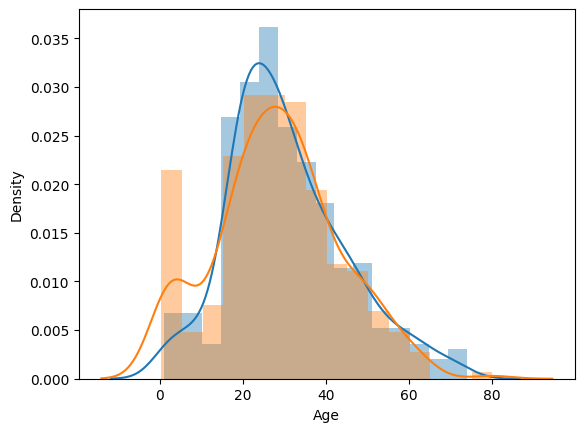

In [63]:
sns.distplot(titanic[titanic['Survived']==0]['Age'])
sns.distplot(titanic[titanic['Survived']==1]['Age'])

# 5.HeatMap (Categorical - Categorical)

In [66]:
pd.crosstab(titanic['Pclass'],titanic['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

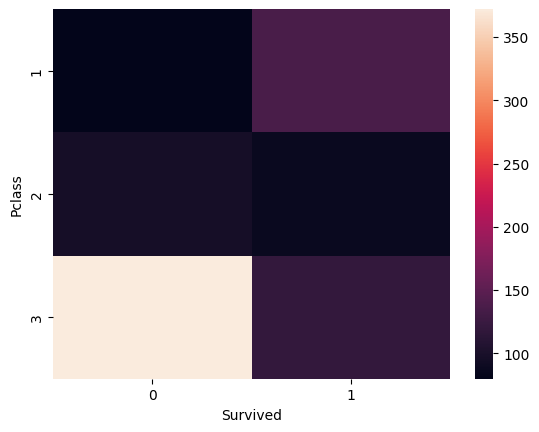

In [65]:
sns.heatmap(pd.crosstab(titanic['Pclass'],titanic['Survived']))

<Axes: xlabel='Sex'>

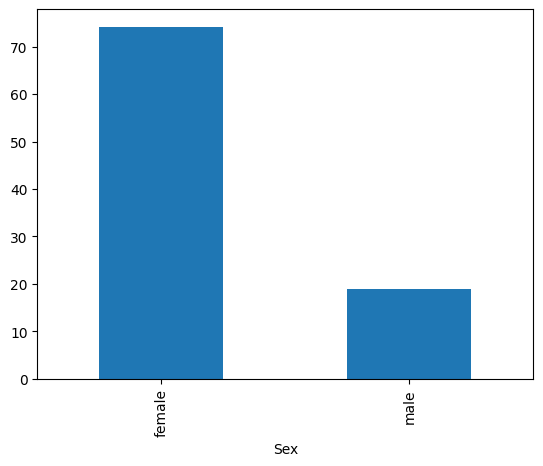

In [77]:
(titanic.groupby('Sex')['Survived'].mean()*100).plot(kind='bar')

# 6.ClusterMap (Categorical - Categorical)

In [80]:
pd.crosstab(titanic['Parch'],titanic['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


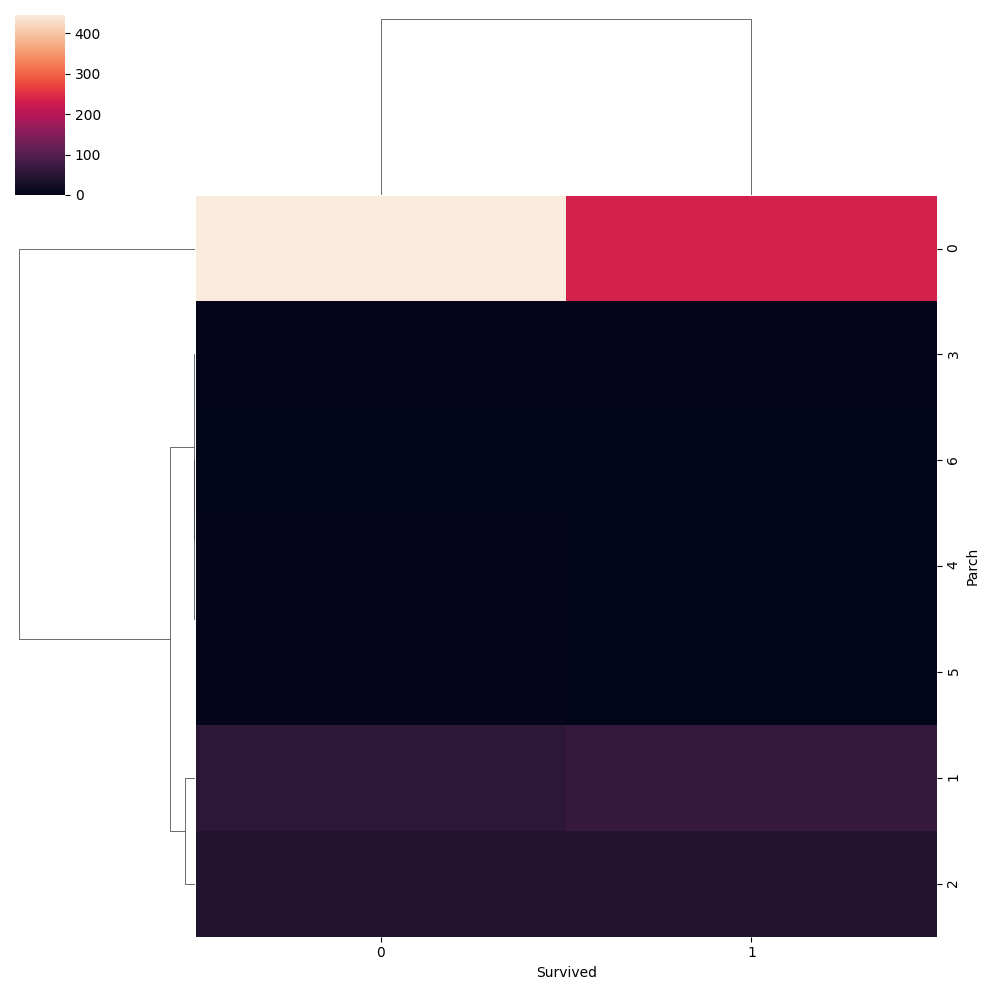

In [81]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']) )

# 7.Pairplot

In [82]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


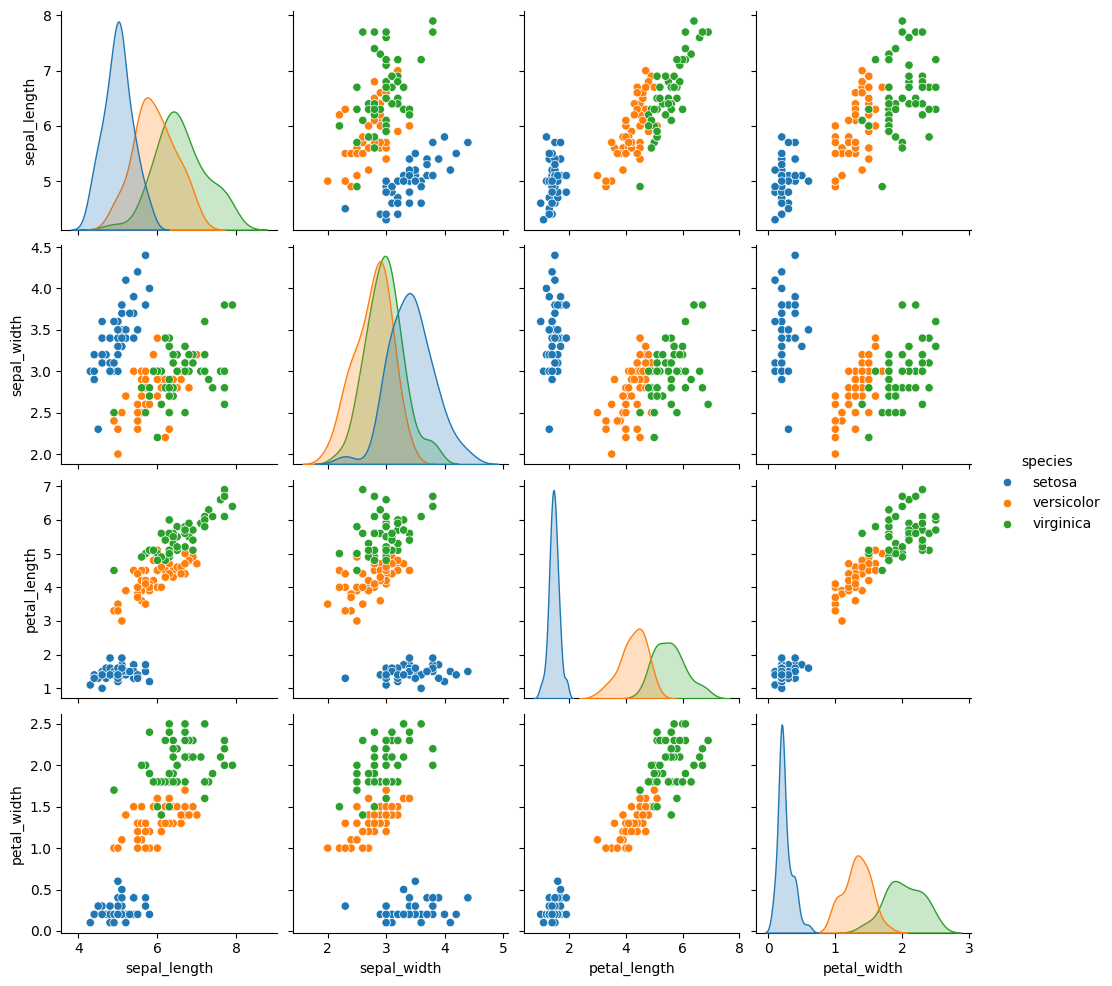

In [83]:
sns.pairplot(iris,hue='species')

# 8.Lineplot(Numerical - Numerical)

In [85]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [88]:
print(flights.dtypes)


year             int64
month         category
passengers       int64
dtype: object


In [92]:
new = flights.groupby('year')['passengers'].sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

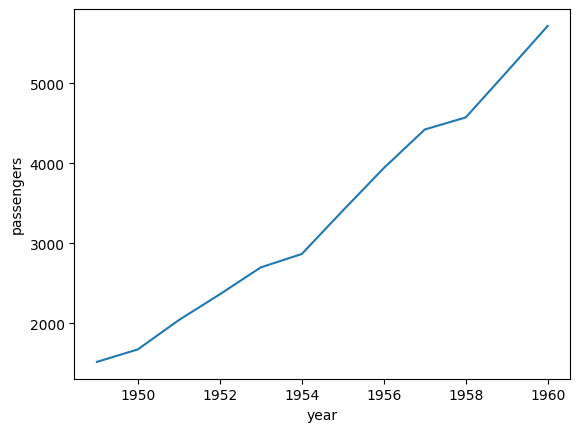

In [91]:
sns.lineplot(x=new['year'],y=new['passengers'])

In [96]:
flights.pivot_table(columns='year',index='month',values='passengers')

<ipython-input-96-b53fabb2bc3d>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  flights.pivot_table(columns='year',index='month',values='passengers')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<ipython-input-99-81bd40d76077>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(flights.pivot_table(columns='year',index='month',values='passengers'))


<Axes: xlabel='year', ylabel='month'>

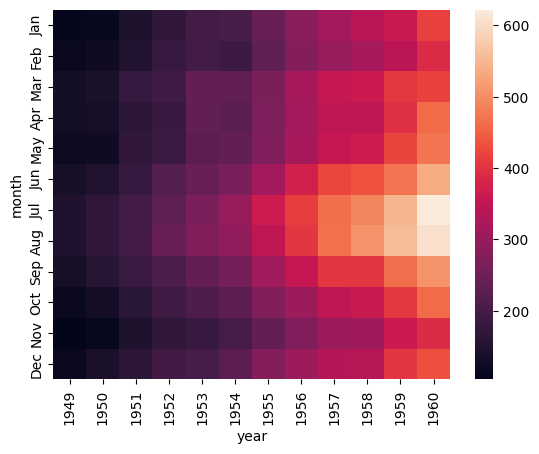

In [99]:
sns.heatmap(flights.pivot_table(columns='year',index='month',values='passengers'))

<ipython-input-100-397ccaf921c3>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.clustermap(flights.pivot_table(columns='year',index='month',values='passengers'))


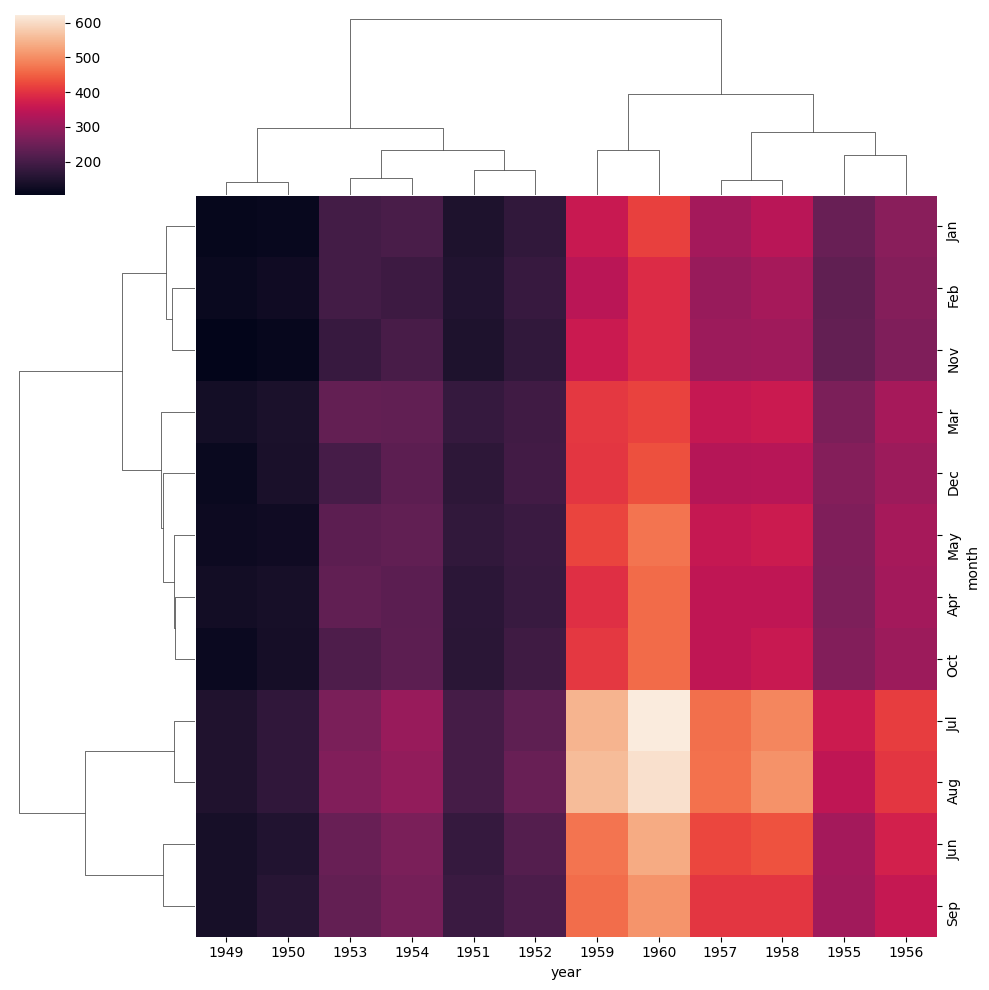

In [100]:
sns.clustermap(flights.pivot_table(columns='year',index='month',values='passengers'))